In [4]:
#Installing & Importing necessary librariers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

In [5]:
#Loading data
df = pd.read_csv("C:\\Users\\ADMIN\Desktop\\Beverages\\Beverage.csv")

FileNotFoundError: ignored

In [ ]:
#Drop unecessary column
df.drop(['Unnamed: 0','Co2', 'Date_coder', 'Day', 'Hour', 'Month', 'PSP', 'Palletizer', 'Plasmax', 'Preform', 'Uday', 'Week', 'Year', 'product'], axis = 1, inplace = True)

In [6]:
#Date & Time formatting
df['time'] = pd.to_datetime(df['time'], format= "%Y-%m-%d %H:%M:%S") 

NameError: ignored

In [7]:
#Making time as index
df.index = df['time']

NameError: ignored

In [ ]:
#Aggregation by hour
df = df.resample('H').sum()
df.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 00:00:00+00:00,0.0,0.0,2.0
2020-08-16 01:00:00+00:00,0.0,0.0,0.0
2020-08-16 02:00:00+00:00,0.0,0.0,0.0
2020-08-16 03:00:00+00:00,0.0,0.0,0.0
2020-08-16 04:00:00+00:00,0.0,0.0,0.0


In [ ]:
df.isnull().sum()

Blower      0
Filler      0
Labeller    0
dtype: int64

In [ ]:
df.plot()

In [ ]:
#As filler consists of lot of null values we are importing few values from past days 
df.iloc[111:144] = df.iloc[63:96].to_numpy()

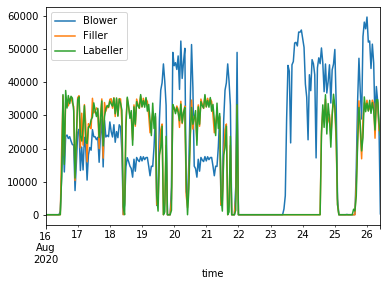

In [ ]:
df.plot()

In [ ]:
df.head()

,Blower,Filler,Labeller
time,,,
2020-08-16 00:00:00+00:00,0.0,0.0,2.0
2020-08-16 01:00:00+00:00,0.0,0.0,0.0
2020-08-16 02:00:00+00:00,0.0,0.0,0.0
2020-08-16 03:00:00+00:00,0.0,0.0,0.0
2020-08-16 04:00:00+00:00,0.0,0.0,0.0


In [ ]:
#Creating train and test set 
train = df[0:175] 
test = df[175:]

In [ ]:
filler_train = train.Filler
filler_test = test.Filler

In [ ]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Filler'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(Filler):
    result=adfuller(Filler)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Filler'])

ADF Test Statistic : -2.986859068082989
p-value : 0.03613995546033269
#Lags Used : 5
Number of Observations Used : 245
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

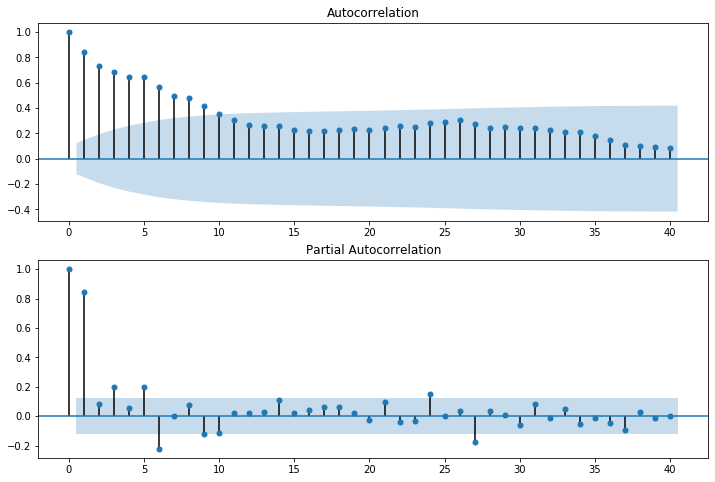

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Filler'].iloc[0:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Filler'].iloc[0:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=0, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
#model=ARIMA(df1['Filler'],order=(1,0,1))
#model_fit=model.fit()
filler_model = ARIMA(filler_train, order=(1,0,1))

In [ ]:
#model_fit.summary()
filler_model_fit = filler_model.fit()

In [ ]:
filler_model_fit.aic

3683.113202296485

In [ ]:
filler_forecast = filler_model_fit.forecast(steps = 76)[0]

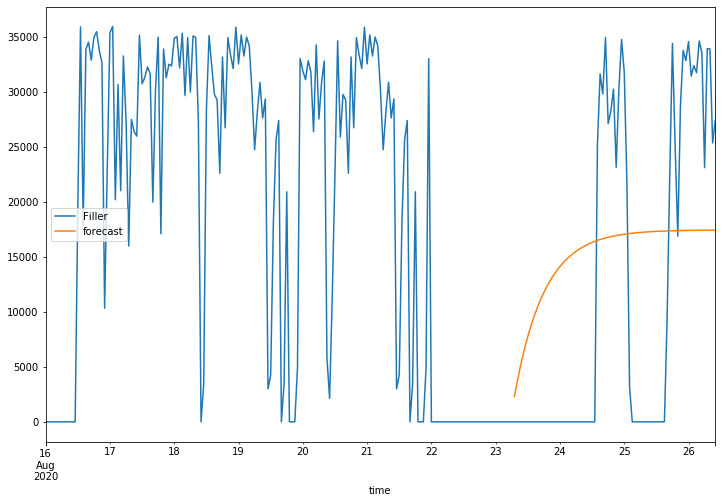

In [ ]:
#df1['forecast']=model_fit.predict(start=233,end=250,dynamic=True)
#df1[['Filler','forecast']].plot(figsize=(12,8))
df['forecast']=filler_model_fit.predict(start=175,end=251,dynamic=True)
df[['Filler','forecast']].plot(figsize=(12,8))

In [ ]:
from sklearn.metrics import mean_squared_error
#from math import sqrt
import numpy as np

In [ ]:
np.sqrt(mean_squared_error(filler_test,filler_forecast))

13759.856747513531

In [ ]:
#model=sm.tsa.statespace.SARIMAX(df1['Filler'],order=(1, 1, 1),seasonal_order=(1,1,1,24))
#results=model.fit()
filler_model=sm.tsa.statespace.SARIMAX(filler_train,order=(1, 0, 1),seasonal_order=(1,0,1,24))

In [ ]:
filler_model_fit = filler_model.fit()

In [ ]:
#results.summary()
filler_model_fit.aic

3677.713907283943

In [ ]:
filler_forecast = filler_model_fit.forecast(steps = 76)

In [ ]:
np.sqrt(mean_squared_error(filler_test,filler_forecast))

16193.875805722646

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


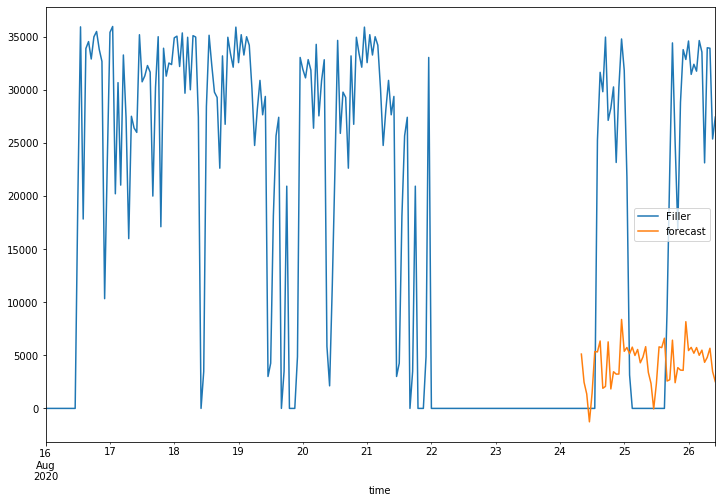

In [ ]:
df['forecast']=filler_model_fit.predict(start=200,end=251,dynamic=True)
df[['Filler','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(hours=x)for x in range(0,48)]

In [ ]:
future_datest_df1=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df1

,Blower,Filler,Labeller,forecast
2020-08-26 11:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 12:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 13:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 14:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 15:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 16:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 17:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 18:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 19:00:00+00:00,NaN,NaN,NaN,NaN
2020-08-26 20:00:00+00:00,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2014: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


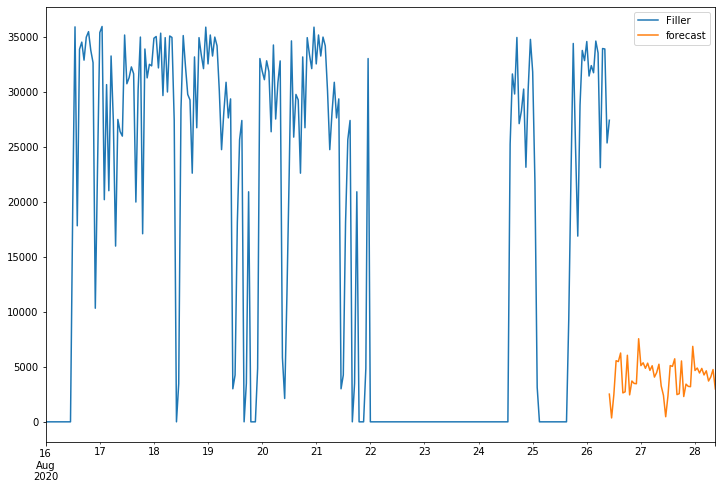

In [ ]:
future_df['forecast'] = filler_model_fit.predict(start = 250, end = 300, dynamic= True)  
future_df[['Filler', 'forecast']].plot(figsize=(12, 8))

In [ ]:
import dtale

In [ ]:
dtale.show(future_df)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1102: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
#Creating a data frame to remove decimals in filler
df1 = future_df.forecast
df1.dropna(inplace = True)
df1 = df1.astype(dtype = 'int64')
future_df1=pd.concat([df,df1])
future_df1

,Blower,Filler,Labeller,forecast,0
2020-08-16 00:00:00+00:00,0.0,NaN,2.0,NaN,NaN
2020-08-16 01:00:00+00:00,0.0,NaN,0.0,NaN,NaN
2020-08-16 02:00:00+00:00,0.0,NaN,0.0,NaN,NaN
2020-08-16 03:00:00+00:00,0.0,NaN,0.0,NaN,NaN
2020-08-16 04:00:00+00:00,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...
2020-08-28 05:00:00+00:00,NaN,NaN,NaN,NaN,4640.0
2020-08-28 06:00:00+00:00,NaN,NaN,NaN,NaN,3711.0
2020-08-28 07:00:00+00:00,NaN,NaN,NaN,NaN,4080.0
2020-08-28 08:00:00+00:00,NaN,NaN,NaN,NaN,4755.0


In [ ]:
future_df1 = future_df1.drop('forecast', axis = 1)
future_df1.rename(columns={ 0 :'forecast'}, inplace=True)

In [ ]:
#Forecasting final values of filler
dtale.show(future_df1)

NameError: ignored